# Proyecto Final

Gonzalo Rojas Bernard

## Abstract

Este proyecto tiene como objetivo desarrollar un modelo predictivo para identificar a los pacientes con diabetes que corren un mayor riesgo de ser readmitidos en el hospital dentro de los 30 días posteriores al alta. La motivación detrás de este proyecto es mejorar la calidad de atención de los pacientes con diabetes, que a menudo enfrentan desafíos significativos en el manejo de su enfermedad. Al identificar a los pacientes que corren un mayor riesgo de readmisión, los profesionales médicos pueden tomar medidas preventivas para reducir la probabilidad de reingreso y mejorar los resultados de los pacientes.

Este proyecto está dirigido a una audiencia amplia, incluyendo profesionales médicos, investigadores en salud pública y estudiantes de ciencias de datos. Los profesionales médicos pueden utilizar los resultados de este proyecto para mejorar la atención y el seguimiento de los pacientes con diabetes, especialmente aquellos con mayor riesgo de readmisión. Los investigadores en salud pública pueden utilizar los hallazgos de este proyecto para informar políticas y programas destinados a mejorar la atención de los pacientes con diabetes. Los estudiantes de ciencias de datos pueden utilizar este proyecto como un ejemplo práctico de cómo aplicar técnicas de ciencia de datos en un problema del mundo real, y aprender nuevas habilidades y técnicas de preprocesamiento de datos, análisis exploratorio y modelado predictivo. En general, este proyecto tiene el potencial de mejorar la atención de los pacientes con diabetes y de servir como un recurso valioso para aquellos interesados en la aplicación de la ciencia de datos en la atención médica y la salud pública.

## Preguntas de interés

- ¿Existen factores de la persona que atribuyan a que un paciente sea readmitido?
- ¿Existen factores clínicos que atribuyan a que un paciente sea readmitido?

Se buscará responder estas preguntas mediante uso de análisis de datos y modelos predictivos.

## Código

Librerías utilizadas.

In [2]:
#importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from scipy.stats import randint

In [3]:
# leer el dataset
file = pd.read_csv('diabetic_data.csv')
file.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## EDA

Haciendo una breve exploración de datos, se obtienen las siguientes distribuciones.

Distribución por género.

In [5]:
file_gender = file.groupby(['gender']).size().reset_index(name='Cantidad')
file_gender['gender'] = file_gender['gender'].apply(lambda x: x.replace('Female','Mujer').replace('Male','Hombre').replace('Unknown/Invalid','Desconocido'))
file_gender

,gender,Cantidad
0,Mujer,54708
1,Hombre,47055
2,Desconocido,3


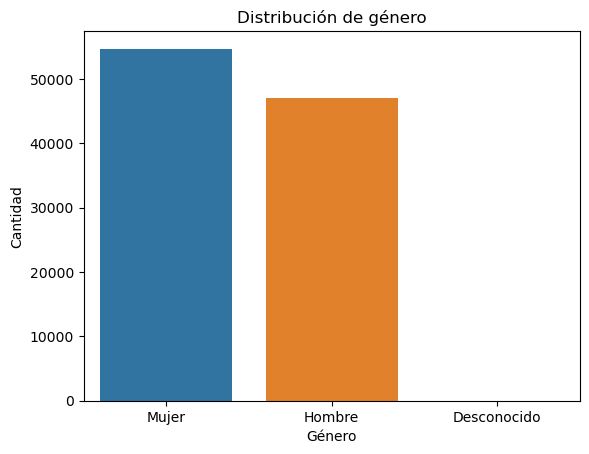

In [6]:
plt.figure()
sns.barplot(file_gender,x='gender',y='Cantidad')
plt.title('Distribución de género')
plt.xlabel('Género')
plt.show()

Se observa una leve mayor cantidad de mujeres que hombres en este dataset, con una poca cantidad de géneros desconocidos.


Distribución por rango etario

In [7]:
file_age = file.groupby(['age']).size().reset_index(name='Cantidad')
file_age = file_age.rename(columns={'age':'Edad'})
file_age

,Edad,Cantidad
0,[0-10),161
1,[10-20),691
2,[20-30),1657
3,[30-40),3775
4,[40-50),9685
5,[50-60),17256
6,[60-70),22483
7,[70-80),26068
8,[80-90),17197
9,[90-100),2793


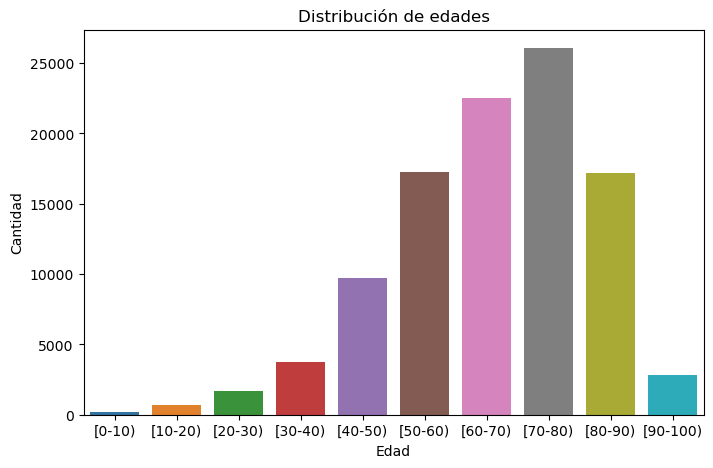

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(file_age,x='Edad',y='Cantidad')
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.show()

Se observa que el rango de edad más repetido en este dataset es desde los 70 a 80 años, lo cual induce que personas de mayor edad están más expuestas a la diabetes.

Distribución de razas

In [9]:
file_race = file.groupby(['race']).size().reset_index(name='Cantidad')
file_race

,race,Cantidad
0,?,2273
1,AfricanAmerican,19210
2,Asian,641
3,Caucasian,76099
4,Hispanic,2037
5,Other,1506


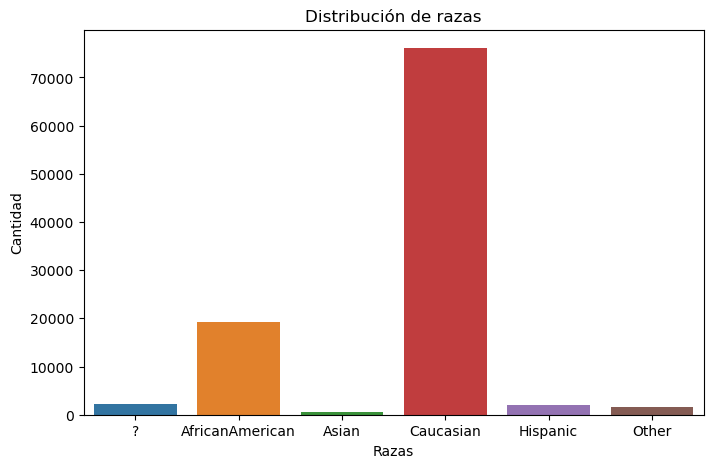

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(file_race,x='race',y='Cantidad')
plt.title('Distribución de razas')
plt.xlabel('Razas')
plt.show()

Ahora veremos un análisis sobre el tiempo de hospitalización

In [11]:
tiempo_promedio = file['time_in_hospital'].mean()
tiempo_promedio

4.395986871843248

In [12]:
tiempo_promedio_edad = file.groupby('age')['time_in_hospital'].mean().reset_index()
tiempo_promedio_edad

,age,time_in_hospital
0,[0-10),2.546584
1,[10-20),3.191027
2,[20-30),3.564876
3,[30-40),3.799735
4,[40-50),4.039649
5,[50-60),4.125753
6,[60-70),4.382244
7,[70-80),4.590878
8,[80-90),4.808629
9,[90-100),4.755818


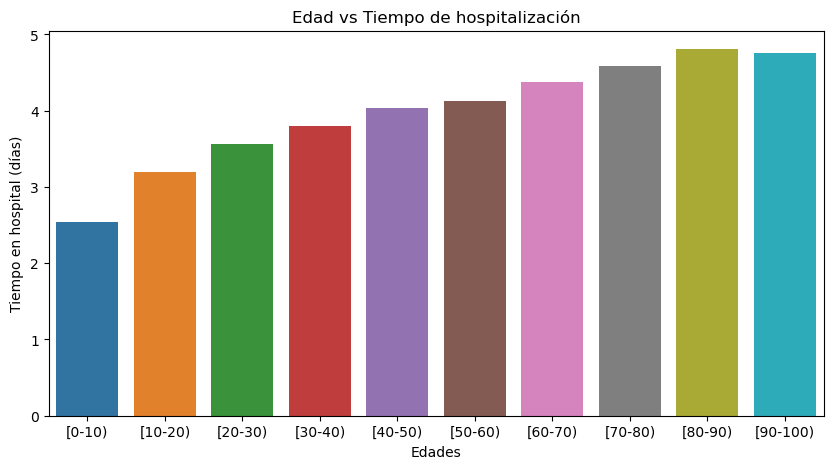

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(tiempo_promedio_edad,x='age',y='time_in_hospital')
plt.title('Edad vs Tiempo de hospitalización')
plt.xlabel('Edades')
plt.ylabel('Tiempo en hospital (días)')
plt.show()

Se observa una tendencia hacia más días mientras más edad tienen los pacientes, por lo que se podría concluir que mientras más edad se tiene, más agravante es la condición de la diabetes una vez en el hospital.

Los resultados de este EDA se tendrán en consideración para los siguientes análisis.

## Ingeniería de atributos

La variable de interés en este proyecto es saber si un paciente fue readmitido o no, por lo que queda redundante saber si fue mayor o menor a 30 días, lo cual podría ser utilizado para un proyecto futuro.

Se cambia los valores para únicamente saber si un paciente fue readmitido o no.

Cambiamos manualmente la variable 'y' (readmitted) en donde el valor 1 será si el paciente fue readmitido y 0 para no readmitido.

In [14]:
file['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [15]:
file_norm = file.copy()
file_norm['readmitted'] = file_norm['readmitted'].apply(lambda x: x.replace('>30','1').replace('<30','1').replace('NO','0'))
file_norm['readmitted'] = file_norm['readmitted'].apply(lambda x: int(x))
file_norm['readmitted'].value_counts()

0    54864
1    46902
Name: readmitted, dtype: int64

Se seleccionan columnas para X (para la predicción):

In [16]:
file_norm.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [17]:
label_encoder = LabelEncoder()
categorical_features = ['age',
    'race',
    'gender',
    'max_glu_serum',
    'A1Cresult',
    'metformin',
    'repaglinide',
    'nateglinide',
    'chlorpropamide',
    'glimepiride',
    'acetohexamide',
    'glipizide',
    'glyburide',
    'tolbutamide',
    'pioglitazone',
    'rosiglitazone',
    'acarbose',
    'miglitol',
    'troglitazone',
    'tolazamide',
    'examide',
    'citoglipton',
    'insulin',
    'glyburide-metformin',
    'glipizide-metformin',
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone',
    'change',
    'diabetesMed'
]

file_norm[categorical_features] = file_norm[categorical_features].apply(label_encoder.fit_transform)

In [18]:
persona_features = ['age','race','gender']

In [19]:
clinic_features = ['max_glu_serum',
    'A1Cresult',
    'metformin',
    'repaglinide',
    'nateglinide',
    'chlorpropamide',
    'glimepiride',
    'acetohexamide',
    'glipizide',
    'glyburide',
    'tolbutamide',
    'pioglitazone',
    'rosiglitazone',
    'acarbose',
    'miglitol',
    'troglitazone',
    'tolazamide',
    'examide',
    'citoglipton',
    'insulin',
    'glyburide-metformin',
    'glipizide-metformin',
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone',
    'change',
    'diabetesMed']

## Entrenamiento y testeo

Se comienza con el entrenamiento para las features individuales. Se ocuparán 3 algoritmos de clasificación, KNN, Random Forest y Decision Tree.

## KNN

In [20]:
X = file_norm[persona_features[:]]
y = file_norm['readmitted']

In [21]:
# se selecciona el test y train KNN (30% test y 70% train)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# seleccion del algoritmo
knn_classifier = KNeighborsClassifier(n_neighbors=7)  # 7 vecinos más cercanos (escogido)
knn_classifier.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=7)

In [23]:
# predicciones
y_pred_knn = knn_classifier.predict(X_test_knn)

In [24]:
# accuracy
accuracy = accuracy_score(y_test_knn, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.5106780216180806


In [25]:
# precisión
from sklearn.metrics import precision_score
precision_score(y_test_knn, y_pred_knn)

0.47304498698723507

In [26]:
# recall
from sklearn.metrics import recall_score
recall_score(y_test_knn, y_pred_knn)

0.5426114151681001

In [27]:
### f1 score
from sklearn.metrics import f1_score
f1_score(y_test_knn, y_pred_knn)

0.505445757605853

Para los valores individuales no nos muestran buenos valores para la clasificación KNN.

In [28]:
fpr_knn, tpr_knn, umbral_knn = roc_curve((y_test_knn), y_pred_knn)

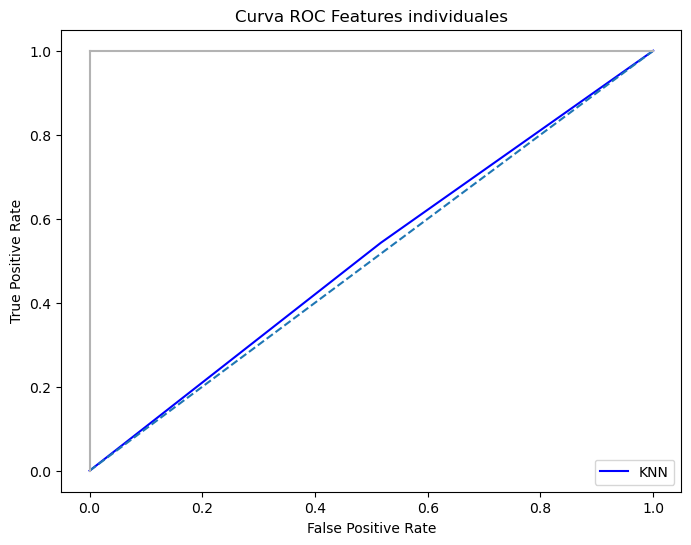

In [29]:
plt.subplots(1, figsize=(8,6))
plt.title('Curva ROC Features individuales')
plt.plot(fpr_knn, tpr_knn, color = "blue", label = "KNN")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Según lo visto en la gráfica, no contamos con un buen clasificador utilizando KNN, veamos la matriz de confusión.

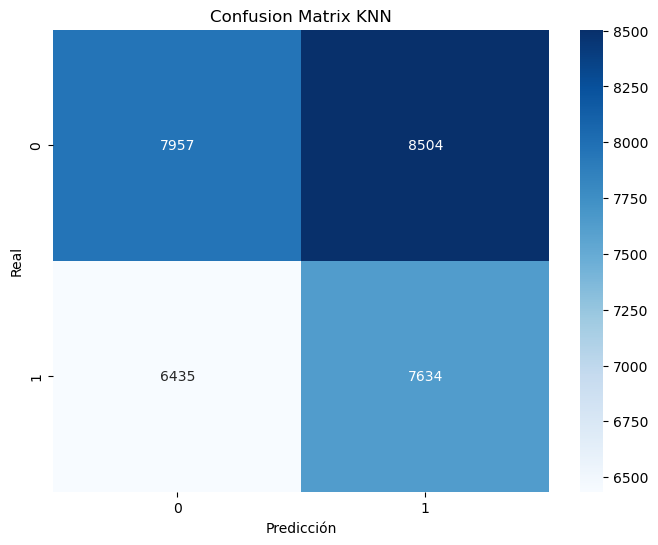

In [30]:
# Matriz de confusión
cm = confusion_matrix(y_test_knn, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix KNN')
plt.show()

Ahí está visto más claramente, que actúa de manera pseudo-aleatoria el clasificador, lo cual puede significar que los factores individuales no influyen en cuanto un paciente sea readmitido por diabetes o no, pero para descartar se necesitan más pruebas con otros clasificadores.

Se corrobora con una validación cruzada:

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_classifier, X, y, cv=10)

# Imprimir las puntuaciones de precisión para cada fold
print("Puntuaciones de precisión para cada fold:", scores)
print("Precisión media:", np.mean(scores))

Puntuaciones de precisión para cada fold: [0.47577872 0.49739609 0.49690479 0.50496217 0.49543087 0.48255871
 0.49184355 0.49056604 0.4990173  0.49115566]
Precisión media: 0.49256138923599463


Seguimos con las información clínica.

In [32]:
X = file_norm[clinic_features[:]]
y = file_norm['readmitted']

In [33]:
# se selecciona el test y train KNN (30% test y 70% train)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
# seleccion del algoritmo
knn_classifier = KNeighborsClassifier(n_neighbors=7)  # 7 vecinos más cercanos (escogido)
knn_classifier.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=7)

In [35]:
# predicciones
y_pred_knn = knn_classifier.predict(X_test_knn)

In [36]:
# accuracy
accuracy = accuracy_score(y_test_knn, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.530789387487717


In [37]:
# precisión
from sklearn.metrics import precision_score
precision_score(y_test_knn, y_pred_knn)

0.48668054110301767

In [38]:
# recall
from sklearn.metrics import recall_score
recall_score(y_test_knn, y_pred_knn)

0.33243300874262566

In [39]:
### f1 score
from sklearn.metrics import f1_score
f1_score(y_test_knn, y_pred_knn)

0.3950335740529583

Se muestran ligeras mejoras con el uso de features clínicas.

In [40]:
fpr_knn, tpr_knn, umbral_knn = roc_curve((y_test_knn), y_pred_knn)

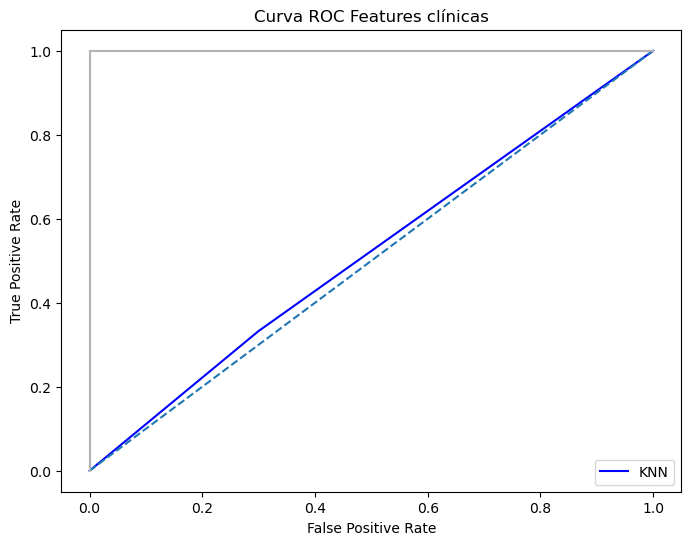

In [41]:
plt.subplots(1, figsize=(8,6))
plt.title('Curva ROC Features clínicas')
plt.plot(fpr_knn, tpr_knn, color = "blue", label = "KNN")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

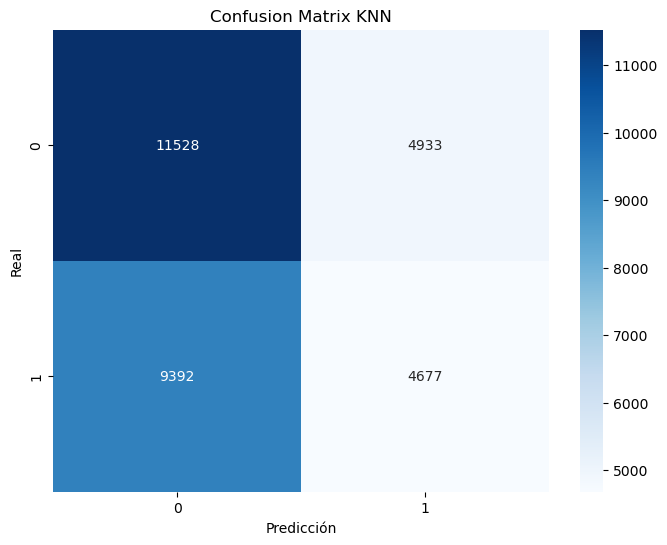

In [42]:
# Matriz de confusión
cm = confusion_matrix(y_test_knn, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix KNN')
plt.show()

Con esta ligera mejora, igualmente el comportamiento del modelo de predicción se muestra aleatorio, se corrobora nuevamente con la validación cruzada.

In [43]:
scores = cross_val_score(knn_classifier, X, y, cv=10)

# Imprimir las puntuaciones de precisión para cada fold
print("Puntuaciones de precisión para cada fold:", scores)
print("Precisión media:", np.mean(scores))

Puntuaciones de precisión para cada fold: [0.49130392 0.4956274  0.49503783 0.54888474 0.52834824 0.51832564
 0.53586871 0.50904088 0.49272799 0.48132862]
Precisión media: 0.5096493953640067


## Random Forest

Análogamente a KNN, se analiza las features individuales y clínicas para el clasificador Random Forest.

In [44]:
X = file_norm[persona_features[:]]
y = file_norm['readmitted']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fitea
clf_rf.fit(X_train_rf, y_train_rf)

# predicción
y_pred_rf = clf_rf.predict(X_test_rf)

In [45]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.5386164881595755


In [46]:
precision_score(y_test_rf, y_pred_rf)

0.535483870967742

In [47]:
recall_score(y_test_rf, y_pred_rf)

0.008827908955541374

In [48]:
f1_score(y_test_rf, y_pred_rf)

0.017369467406089776

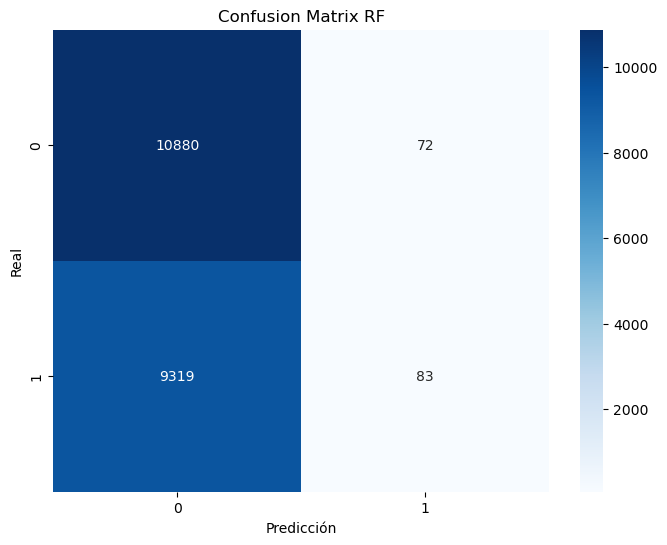

In [49]:
# Matriz de confusión
cm = confusion_matrix(y_test_rf, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') #xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix RF')
plt.show()

Se observa que el clasificador no es bueno con las features individuales, debido a que puede predecir bien las no readmisiones, pero en cuanto si un paciente es readmitido, no predice de manera correcta.

In [50]:
fpr_rf, tpr_rf, umbral_rf = roc_curve((y_test_rf), y_pred_rf)

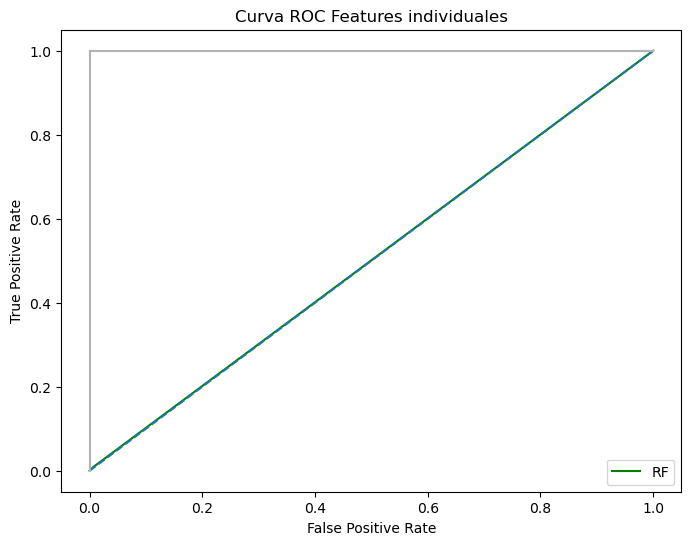

In [51]:
plt.subplots(1, figsize=(8,6))
plt.title('Curva ROC Features individuales')
plt.plot(fpr_rf, tpr_rf, color = "green", label = "RF")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Se observan esos valores en la curva ROC.

Y análogamente al análisis anterior, se corrobora con una validación cruzada.

In [52]:
scores = cross_val_score(clf_rf, X, y, cv=10)

# Imprimir las puntuaciones de precisión para cada fold
print("Puntuaciones de precisión para cada fold:", scores)
print("Precisión media:", np.mean(scores))

Puntuaciones de precisión para cada fold: [0.53532475 0.54033605 0.5407291  0.53974649 0.53856736 0.53817431
 0.5382272  0.5398978  0.53920991 0.53753931]
Precisión media: 0.5387752272203383


Obtiene mejor precisión que el KNN (relativamente), pero debido a que únicamente predice bíen la mitad de los datos.

Probemos con las feautures clínicas.

In [53]:
X = file_norm[clinic_features[:]]
y = file_norm['readmitted']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fitea
clf_rf.fit(X_train_rf, y_train_rf)

# predicción
y_pred_rf = clf_rf.predict(X_test_rf)

In [54]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.550751694998526


In [55]:
precision_score(y_test_rf, y_pred_rf)

0.5220890410958904

In [56]:
recall_score(y_test_rf, y_pred_rf)

0.3242927036800681

In [57]:
f1_score(y_test_rf, y_pred_rf)

0.4000787298254822

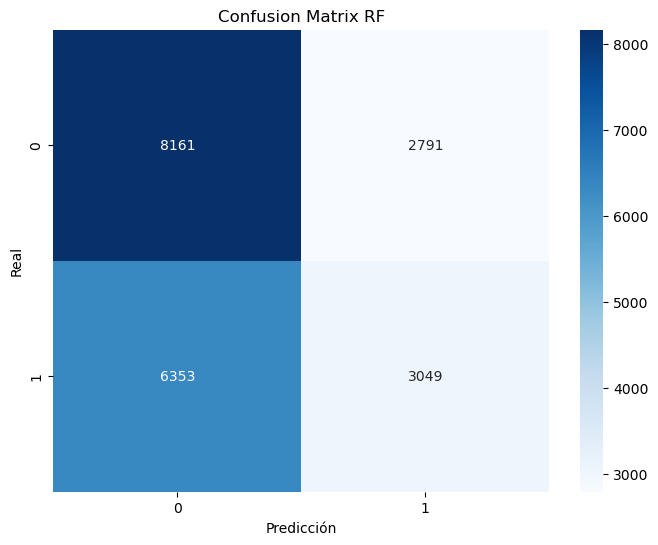

In [58]:
# Matriz de confusión
cm = confusion_matrix(y_test_rf, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') #xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix RF')
plt.show()

Obtiene mejores valores con las features clínicas, pero igualmente bajas para un uso práctico.

In [59]:
fpr_rf, tpr_rf, umbral_rf = roc_curve((y_test_rf), y_pred_rf)

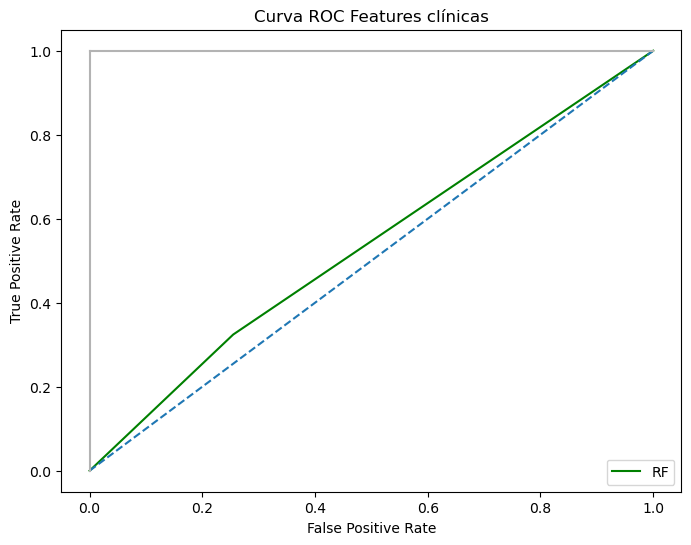

In [60]:
plt.subplots(1, figsize=(8,6))
plt.title('Curva ROC Features clínicas')
plt.plot(fpr_rf, tpr_rf, color = "green", label = "RF")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Se muestra en la curva ROC un ligero mejoramiento.

In [61]:
scores = cross_val_score(clf_rf, X, y, cv=10)

# Imprimir las puntuaciones de precisión para cada fold
print("Puntuaciones de precisión para cada fold:", scores)
print("Precisión media:", np.mean(scores))

Puntuaciones de precisión para cada fold: [0.54053257 0.54632996 0.54544561 0.55782647 0.53227867 0.54200649
 0.53979953 0.5452044  0.5581761  0.55581761]
Precisión media: 0.5463417411579198


La explicación a estas precisiones es similar a la anterior (features individuales), con un leve mejoramiento igualmente.

## Decision Tree

Para terminar las comparaciones, se utiliza el clasificador Decision Tree para el mismo análisis que con los dos anteriores.

In [62]:
from sklearn.tree import DecisionTreeClassifier

X = file_norm[persona_features[:]]
y = file_norm['readmitted']

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.3, random_state=42)

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_dt, y_train_dt)

y_pred_dt = clf_dt.predict(X_test_dt)

In [63]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test_dt, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_rf)

Decision Tree Accuracy: 0.5392400917130691


In [64]:
precision_score(y_test_dt, y_pred_dt)

0.50390625

In [65]:
recall_score(y_test_dt, y_pred_dt)

0.009169095173786338

In [66]:
f1_score(y_test_dt, y_pred_dt)

0.01801047120418848

Se observan valores bajos para *recall* y *f1 score*, resultados similares a Random Forest

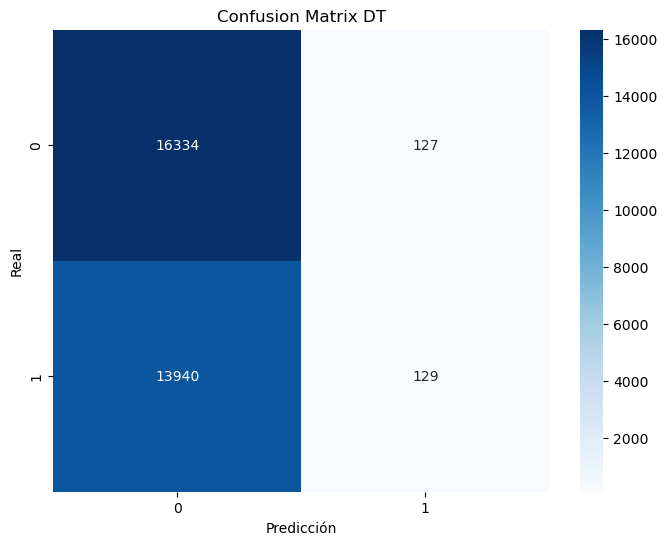

In [67]:
# Matriz de confusión
cm = confusion_matrix(y_test_dt, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') #xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix DT')
plt.show()

Al igual que con Random Forest, se observa un comportamiento similar al predecir utilizando variables individuales.

In [68]:
fpr_dt, tpr_dt, umbral_dt = roc_curve((y_test_dt), y_pred_dt)

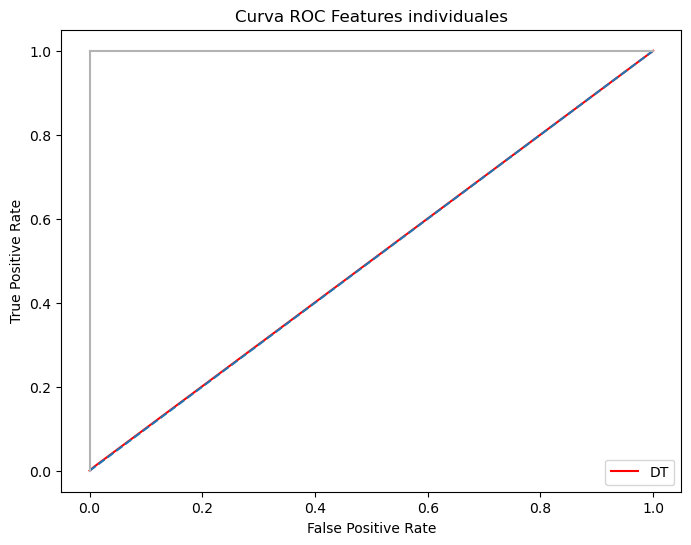

In [69]:
plt.subplots(1, figsize=(8,6))
plt.title('Curva ROC Features individuales')
plt.plot(fpr_dt, tpr_dt, color = "red", label = "DT")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Y también, se observa el mismo comportamiento en la curva ROC que con Random Forest.

In [70]:
scores = cross_val_score(clf_dt, X, y, cv=10)

# Imprimir las puntuaciones de precisión para cada fold
print("Puntuaciones de precisión para cada fold:", scores)
print("Precisión media:", np.mean(scores))

Puntuaciones de precisión para cada fold: [0.53532475 0.54043431 0.5407291  0.53994301 0.53886214 0.53827258
 0.5382272  0.53999607 0.53930818 0.53793239]
Precisión media: 0.5389029720333741


Y con features clínicas:

In [71]:
X = file_norm[clinic_features[:]]
y = file_norm['readmitted']

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.3, random_state=42)

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_dt, y_train_dt)

y_pred_dt = clf_dt.predict(X_test_dt)

In [72]:
accuracy_rf = accuracy_score(y_test_dt, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_rf)

Decision Tree Accuracy: 0.5516541107107763


In [73]:
precision_score(y_test_dt, y_pred_dt)

0.5239592504087536

In [74]:
recall_score(y_test_dt, y_pred_dt)

0.29611201933328596

In [75]:
f1_score(y_test_dt, y_pred_dt)

0.37838328792007264

Nuevamente, un comportamiento similar que con Random Forest.

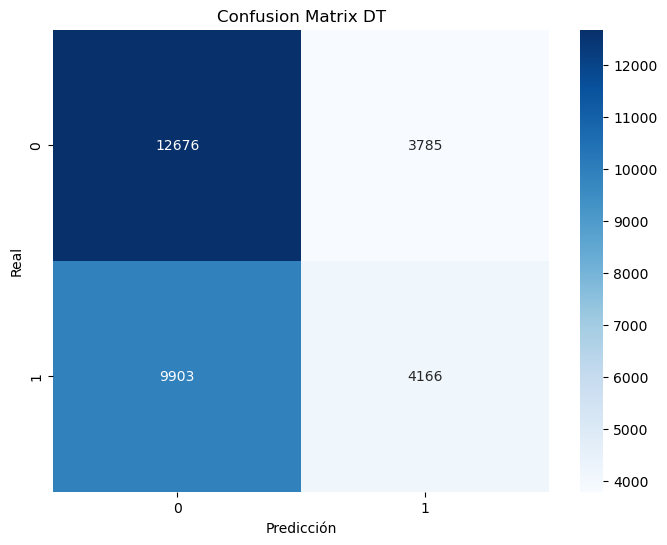

In [76]:
# Matriz de confusión
cm = confusion_matrix(y_test_dt, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') #xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix DT')
plt.show()

In [77]:
fpr_dt, tpr_dt, umbral_dt = roc_curve((y_test_dt), y_pred_dt)

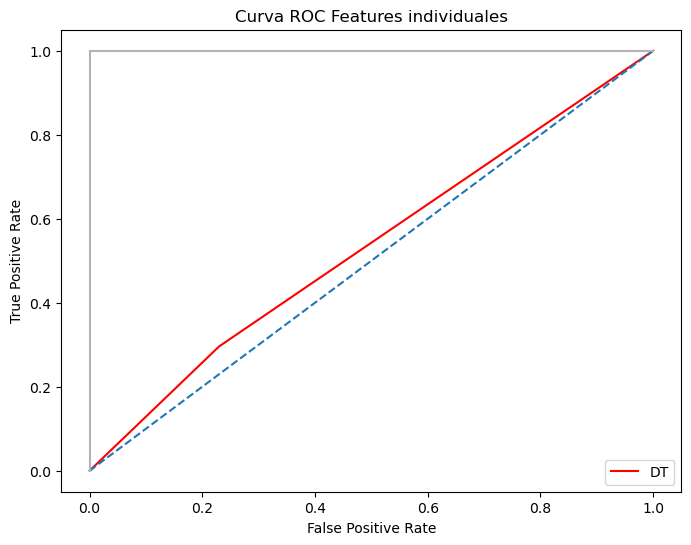

In [78]:
plt.subplots(1, figsize=(8,6))
plt.title('Curva ROC Features individuales')
plt.plot(fpr_dt, tpr_dt, color = "red", label = "DT")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Y un leve mejoramiento en la curva ROC.

In [79]:
scores = cross_val_score(clf_dt, X, y, cv=10)

# Imprimir las puntuaciones de precisión para cada fold
print("Puntuaciones de precisión para cada fold:", scores)
print("Precisión media:", np.mean(scores))

Puntuaciones de precisión para cada fold: [0.53974649 0.54642822 0.54691952 0.55939864 0.5357178  0.54279257
 0.54078223 0.54540094 0.5571934  0.55660377]
Precisión media: 0.5470983588517825


Para una comparación directa, se ocupará únicamente las features clínicas, debido a que son las que mejor resultados muestran.

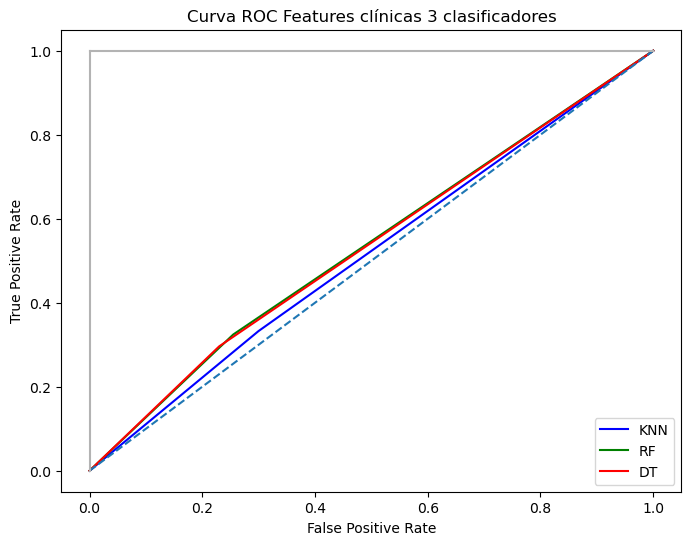

In [80]:
plt.subplots(1, figsize=(8,6))
plt.title('Curva ROC Features clínicas 3 clasificadores')
plt.plot(fpr_knn, tpr_knn, color = "blue", label = "KNN")
plt.plot(fpr_rf, tpr_rf, color = "green", label = "RF")
plt.plot(fpr_dt, tpr_dt, color = "red", label = "DT")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Como conclusión de la sección de entrenamiento y testeo, se están descartando las features individuales como factor de readmisión de un paciente por causa de diabetes, debido a que los clasificadores no fueron capaces de predecir correctamente (con los hiperparámetros fijos) nuestra variable Y. Además los 3 clasificadores muestran un comportamiento pseudo similar al predecir con features clínicas.

## Optimización

La última ejecución de cada clasificador fue con las features clínicas, igualmente las que tuvieron mejor resultado, por lo que se utilizarán en la sección de optimización.

Para la optimización se ocupará el método de RandomizedSearch, el cual determinará los mejores hiperparámetros para cada clasificador utilizado anteriormente.

## KNN RandomizedSearch

In [81]:
# crear el clasificador KNN
knn = KNeighborsClassifier()

# definir los parametros de distribución
param_dist_knn = {
    'n_neighbors': randint(1, 10),  # vecinos cercanos
    'weights': ['uniform', 'distance'],  # Weighting
    'metric': ['euclidean', 'manhattan']  # distancias
}


In [82]:
# crea el objeto randomizedsearch
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_dist_knn, n_iter=5, cv=5)

# fitea
random_search_knn.fit(X_train_knn, y_train_knn)

# obtiene los hiperparámetros
best_params_knn_random = random_search_knn.best_params_

## Random Forest RandomizedSearch

In [83]:
# Crea un clasificador Random Forest
rf_classifier = RandomForestClassifier()

# define los parámetros
param_dist_rf = {
    'n_estimators': randint(100, 500),  # numero de estimadores
    'max_depth': [None] + list(np.arange(10, 31, 5)),  # profundidad maxima
    'min_samples_split': randint(2, 11),  # minimos split
    'min_samples_leaf': randint(1, 5)  # minimos leaf
}

# crea el objeto randomizedsearch
random_search_rf = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist_rf, n_iter=5, cv=5)

# fitea
random_search_rf.fit(X_train_rf, y_train_rf)

# obtiene hiperparámetros optimizados
best_params_rf_random = random_search_rf.best_params_

## Decision Tree RandomizedSearch

In [84]:
# Crea un clasificador DecisionTree
dt_classifier = DecisionTreeClassifier()

# define los parámetros
param_dist_dt = {
    'max_depth': [None] + list(np.arange(10, 31, 5)),  # máxima profundidad
    'min_samples_split': randint(2, 11),  # minimas samples para split
    'min_samples_leaf': randint(1, 5)  # minimas samples para leaf
}

# crea el objeto randomizedsearch
random_search_dt = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_dist_dt, n_iter=5, cv=5)

# fitea
random_search_dt.fit(X_train_dt, y_train_dt)

# obtiene hiperparámetros optimizados
best_params_dt_random = random_search_dt.best_params_

In [85]:
# imprime hiperparámetros optimizados
print(best_params_knn_random)
print(best_params_rf_random)
print(best_params_dt_random)

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 402}
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3}


Con los resultados de la optimización, se procede a entrenar y armar los clasificadores con los hiperparámetros calculados en la optimización con RandomizedSearch y se realizan todos los pasos anteriores, para luego mostrar la curva ROC con todos los clasificadores.

In [88]:
# seleccion del algoritmo optimizado
knn_classifier = KNeighborsClassifier(n_neighbors=4,metric='manhattan',weights='distance')  # hiperparámetros optimizados
knn_classifier.fit(X_train_knn, y_train_knn) # clinic features
# predicciones
y_pred_knn = knn_classifier.predict(X_test_knn)

In [94]:
# Crea un Random Forest classifier optimizado
clf_rf = RandomForestClassifier(n_estimators=402, max_depth=15,min_samples_leaf=2,min_samples_split=8)

# fitea
clf_rf.fit(X_train_rf, y_train_rf)

# predicción
y_pred_rf = clf_rf.predict(X_test_rf)

In [95]:
# Crea un Decision Tree classifier optimizado
clf_dt = DecisionTreeClassifier(max_depth=20,min_samples_leaf=1,min_samples_split=3)
# fitea
clf_dt.fit(X_train_dt, y_train_dt)

y_pred_dt = clf_dt.predict(X_test_dt)

Curva ROC con clasificadores optimizados con hiperparámetros.

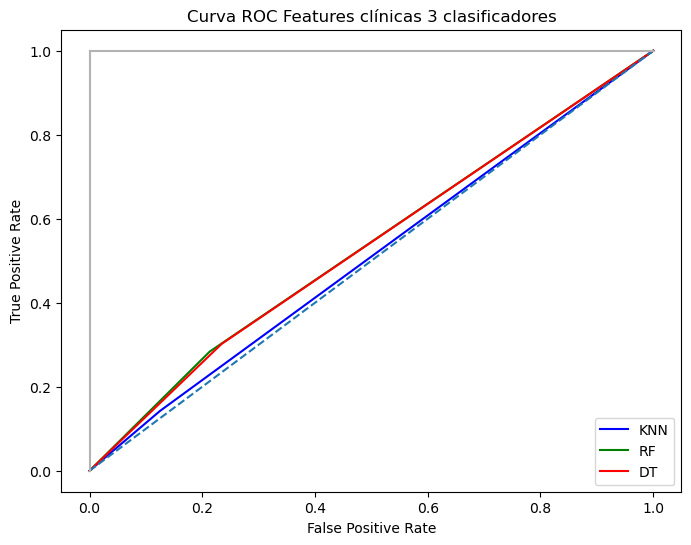

In [96]:
fpr_knn, tpr_knn, umbral_knn = roc_curve((y_test_knn), y_pred_knn)
fpr_rf, tpr_rf, umbral_rf = roc_curve((y_test_rf), y_pred_rf)
fpr_dt, tpr_dt, umbral_dt = roc_curve((y_test_dt), y_pred_dt)

plt.subplots(1, figsize=(8,6))
plt.title('Curva ROC Features clínicas 3 clasificadores')
plt.plot(fpr_knn, tpr_knn, color = "blue", label = "KNN")
plt.plot(fpr_rf, tpr_rf, color = "green", label = "RF")
plt.plot(fpr_dt, tpr_dt, color = "red", label = "DT")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

No se ven cambios mayores con los clasificadores utilizados, puede que los valores de las features no son suficientes para la predicción correcta si un paciente será readmitido por la diabetes o no.

## Selección de modelos

Para la selección de modelos luego de la optimización, se utilizará la métrica de AUC, debido a que se utilizó la curva ROC para la evaluación de la ejecución primaria de cada modelo. El resultado mostrará el mejor clasificador para poder predecir la readmisión de un paciente debido a la diabetes usando features clínicas.

In [101]:
from sklearn.metrics import roc_auc_score

# predice probabilidades para cada modelo
y_prob_knn = knn_classifier.predict_proba(X_test_knn)[:, 1]
y_prob_rf = clf_rf.predict_proba(X_test_rf)[:, 1]
y_prob_dt = clf_dt.predict_proba(X_test_dt)[:, 1]

# calcula el AUC
auc_knn = roc_auc_score(y_test_knn, y_prob_knn)
auc_rf = roc_auc_score(y_test_rf, y_prob_rf)
auc_dt = roc_auc_score(y_test_dt, y_prob_dt)


In [102]:
# Algoritmo de comparación
best_model = None
best_auc = 0

if auc_knn > best_auc:
    best_model = knn_classifier
    best_auc = auc_knn

if auc_rf > best_auc:
    best_model = clf_rf
    best_auc = auc_rf

if auc_dt > best_auc:
    best_model = clf_dt
    best_auc = auc_dt

print("Mejor AUC:", best_auc)

Mejor AUC: 0.5589466495247036


In [104]:
print('KNN:',auc_knn)
print('RF:',auc_rf)
print('DT:',auc_dt)

KNN: 0.5290274560397431
RF: 0.5589466495247036
DT: 0.5523761432006709


Como se puede observar, el mejor AUC corresponde al clasificador Random Forest optimizado con los hiperparámetros calculados anteriormente. Aunque los resultados no fueron satisfactorios, se realizó la comparación paso a paso para decidir que features son más decisivas al querer predecir la readmisión de un paciente debido a la enfermedad diabetes, las cuales fueron las features clínicas, a comparación de las features del individuo, las cuales resultaron ser ambiguas al momento de la clasificación.